In [1]:
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_excel('data/titanic.xls')

In [4]:
data.head(20)

,Survived,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat
0,Yes,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2
1,Yes,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11
2,No,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN
3,No,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN
4,No,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN
5,Yes,First,"Anderson, Mr. Harry",Male,48.0000,0,0,19952,26.5500,E12,Southampton,3
6,Yes,First,"Andrews, Miss. Kornelia Theodosia",Female,63.0000,1,0,13502,77.9583,D7,Southampton,10
7,No,First,"Andrews, Mr. Thomas Jr",Male,39.0000,0,0,112050,0.0000,A36,Southampton,NaN
8,Yes,First,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",Female,53.0000,2,0,11769,51.4792,C101,Southampton,D
9,No,First,"Artagaveytia, Mr. Ramon",Male,71.0000,0,0,PC 17609,49.5042,NaN,Cherbourg,NaN


The below function is to convert the 'Port of Embarkation' to numeric value.

In [5]:
def embarkation_to_num(embarkation: str) -> int:
    ''' Converts embarkation to number. '''
    embarkation = '' if embarkation is None else str(embarkation).split(' ')[0]
    if len(embarkation) == 0: return 0
    first_char = embarkation[0]
    last_chars = embarkation[1:]
    return int(str(ord(first_char)) + last_chars)

We define a function to normalize the values to numeric format, remove all Not-a-Number values as well.

In [6]:
def cleanse(source: pd.DataFrame) -> pd.DataFrame:
    ''' Cleanse and normalize the source data. '''
    target = source.copy()
    target['Survived'] = target['Survived'].map({
        'Yes': 1,
        'No': 0
    })
    target['Passenger Class'] = target['Passenger Class'].map({
        'First': 1,
        'Second': 2,
        'Third': 3
    })
    target['Sex'] = target['Sex'].map({
        'Female': 0,
        'Male': 1
    })
    target['Cabin'] = target['Cabin'].fillna('').apply(embarkation_to_num)
    target['Port of Embarkation'] = target['Port of Embarkation'].map({
        'Southampton': 1,
        'Queenstown': 2,
        'Cherbourg': 3
    })
    return target

The below heat map shows the correlation between every two of the data' properties.

<AxesSubplot:>

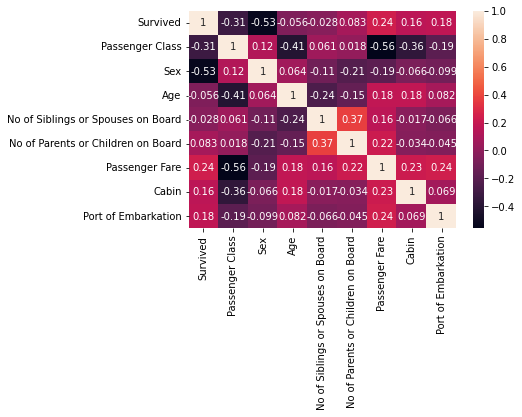

In [10]:
sns.heatmap(cleanse(data).corr(), annot=True)
